# Imports

In [121]:
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [142]:
def missing_values_for_2015_per_place_id():
    DATA_PATH = '/mnt/sdc1/inon/norrecampus/data/by_place_5min'
    
    def get_missing(csv):
        available = pd.read_csv(csv, parse_dates=['start_interval_s'])\
            [lambda df: df.start_interval_s >= '2015-01-01']\
            .start_interval_s
        missing = pd.date_range('2015-01-01', '2015-06-29', freq='5T').difference(available)
        return min(missing), max(missing), len(missing)
    
    return sorted([(os.path.basename(csv), *get_missing(csv)) for csv in glob.glob(os.path.join(DATA_PATH, '*.csv'))],
                 key=lambda triplet: triplet[-1])

count_missing = missing_values_for_2015_per_place_id()

In [143]:
print('\n'.join(str(triplet) for triplet in count_missing))

('ChIJn-nk5gFTUkYRP_uyVc_JgGM.csv', Timestamp('2015-01-02 03:45:00'), Timestamp('2015-06-17 01:25:00'), 61)
('ChIJC9G6K_5SUkYRWa6ieQhstlo.csv', Timestamp('2015-01-02 04:00:00'), Timestamp('2015-06-17 01:25:00'), 73)
('ChIJ4-oTHgJTUkYRyWR7IXyHm-o.csv', Timestamp('2015-01-02 04:40:00'), Timestamp('2015-06-22 01:30:00'), 73)
('ChIJe9cVKP5SUkYRXbHe1dS_Hb0.csv', Timestamp('2015-01-02 03:05:00'), Timestamp('2015-06-09 04:20:00'), 74)
('ChIJxcyFw_9SUkYRrTyRKo86FJA.csv', Timestamp('2015-01-02 02:15:00'), Timestamp('2015-06-09 02:20:00'), 75)
('ChIJX4CkKf5SUkYRjwSVssMj5H4.csv', Timestamp('2015-01-02 03:15:00'), Timestamp('2015-06-22 04:20:00'), 79)
('ChIJRUMvPwJTUkYRN2CILrjIQTo.csv', Timestamp('2015-01-02 04:30:00'), Timestamp('2015-06-23 04:15:00'), 98)
('ChIJdbHNKf5SUkYRH2U_kHcp420.csv', Timestamp('2015-01-02 03:05:00'), Timestamp('2015-06-02 02:30:00'), 101)
('ChIJa6lPPQJTUkYRupdy05xlXnM.csv', Timestamp('2015-01-02 03:45:00'), Timestamp('2015-06-16 04:20:00'), 108)
('ChIJqeYPY1VSUkYR34lDp5Cl

In [151]:
def count_zero_speed():
    DATA_PATH = '/mnt/sdc1/inon/norrecampus/data/by_place_5min'
    
    def get_zero(csv):
        available = pd.read_csv(csv, parse_dates=['start_interval_s'])\
            [lambda df: df.start_interval_s >= '2015-01-01']\
            .speed_mean
        return sum(available == 0.0)
    
    return sorted([(os.path.basename(csv), get_zero(csv)) for csv in glob.glob(os.path.join(DATA_PATH, '*.csv'))])

count_zeros = count_zero_speed()

In [153]:
sorted(count_zeros, key=lambda e: e[-1])

[('ChIJn-nk5gFTUkYRP_uyVc_JgGM.csv', 152),
 ('ChIJC9G6K_5SUkYRWa6ieQhstlo.csv', 157),
 ('ChIJX4CkKf5SUkYRjwSVssMj5H4.csv', 165),
 ('ChIJa6lPPQJTUkYRupdy05xlXnM.csv', 176),
 ('ChIJmRBx2AFTUkYRtUQaLA9PJDE.csv', 179),
 ('ChIJe9cVKP5SUkYRXbHe1dS_Hb0.csv', 180),
 ('ChIJ4-oTHgJTUkYRyWR7IXyHm-o.csv', 185),
 ('ChIJT9erZFVSUkYRNiSDTV-sJzE.csv', 197),
 ('ChIJ37rdi_9SUkYR2RWqxZuK9Qc.csv', 198),
 ('ChIJqeYPY1VSUkYR34lDp5Cl-8g.csv', 202),
 ('ChIJRUMvPwJTUkYRN2CILrjIQTo.csv', 221),
 ('ChIJxygE5wFTUkYRA0H8EQGKqEc.csv', 222),
 ('ChIJdbHNKf5SUkYRH2U_kHcp420.csv', 224),
 ('ChIJxcyFw_9SUkYRrTyRKo86FJA.csv', 225),
 ('ChIJOW51C1lSUkYRRv6n34W9-Zg.csv', 228),
 ('ChIJZ1MlRQJTUkYRMFf_yB0s15M.csv', 256),
 ('ChIJI3hCtFlSUkYRPnfwEKyXdTk.csv', 264),
 ('ChIJqZELHwJTUkYRsPbOfQkyhi8.csv', 276),
 ('ChIJk0ccVwJTUkYRYljOZpd3SYw.csv', 288),
 ('ChIJo6Cu9gFTUkYRKrytetI_Dx0.csv', 305),
 ('ChIJr3zaIgJTUkYRYi8rewaIDHU.csv', 311),
 ('ChIJZaR1M1hSUkYRMlpW_KeERfc.csv', 319),
 ('ChIJcWDyOAJTUkYRCQqJYxTj1UA.csv', 328),
 ('ChIJpyBC

# Globals

In [17]:
DATA_PATH = '/mnt/sdc1/inon/norrecampus/data/by_place_5min'

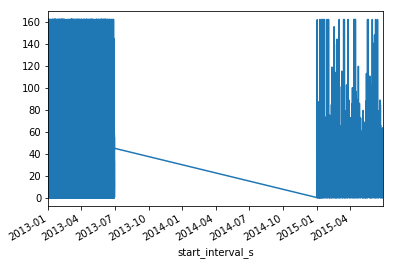

In [86]:
example_place = 'ChIJWZqpIVdSUkYRtXx0lXuClD0'
df = pd.read_csv(
    os.path.join(DATA_PATH, example_place + '.csv'),
    parse_dates=['start_interval_s', 'end_interval_s']
)
df.set_index('start_interval_s').speed_mean.plot()

In [93]:
df_since_2015 = df[df.start_interval_s >= '2015-01-01']
df_since_2015.head()

,place_id,start_interval_s,end_interval_s,flow_bucket,speed_mean
47268,ChIJWZqpIVdSUkYRtXx0lXuClD0,2015-01-01 00:00:00,2015-01-01 00:05:00,0,0.000000
47269,ChIJWZqpIVdSUkYRtXx0lXuClD0,2015-01-01 00:05:00,2015-01-01 00:10:00,4,23.356085
47270,ChIJWZqpIVdSUkYRtXx0lXuClD0,2015-01-01 00:10:00,2015-01-01 00:15:00,5,22.693332
47271,ChIJWZqpIVdSUkYRtXx0lXuClD0,2015-01-01 00:15:00,2015-01-01 00:20:00,6,22.647396
47272,ChIJWZqpIVdSUkYRtXx0lXuClD0,2015-01-01 00:20:00,2015-01-01 00:25:00,6,22.830445


In [108]:
# Missing datetimes
pd.Series(None, index=pd.date_range('2015-01-01', '2015-06-29', freq='5T').difference(df_since_2015.start_interval_s))

2015-01-02 00:35:00   NaN
2015-01-02 02:55:00   NaN
2015-01-03 04:25:00   NaN
2015-01-03 04:30:00   NaN
2015-01-03 04:35:00   NaN
2015-01-03 04:40:00   NaN
2015-01-04 04:35:00   NaN
2015-01-04 04:40:00   NaN
2015-01-04 06:00:00   NaN
2015-01-04 06:05:00   NaN
2015-01-04 08:15:00   NaN
2015-01-04 08:20:00   NaN
2015-01-05 01:05:00   NaN
2015-01-05 01:10:00   NaN
2015-01-05 02:15:00   NaN
2015-01-05 02:20:00   NaN
2015-01-05 02:45:00   NaN
2015-01-05 02:50:00   NaN
2015-01-05 03:35:00   NaN
2015-01-05 04:15:00   NaN
2015-01-06 04:25:00   NaN
2015-01-06 04:30:00   NaN
2015-01-06 04:35:00   NaN
2015-01-07 03:20:00   NaN
2015-01-07 03:55:00   NaN
2015-01-09 02:30:00   NaN
2015-01-09 02:35:00   NaN
2015-01-09 02:40:00   NaN
2015-01-11 05:30:00   NaN
2015-01-11 20:10:00   NaN
                       ..
2015-06-10 02:55:00   NaN
2015-06-10 03:00:00   NaN
2015-06-10 03:55:00   NaN
2015-06-11 03:45:00   NaN
2015-06-11 03:50:00   NaN
2015-06-11 03:55:00   NaN
2015-06-11 04:00:00   NaN
2015-06-12 0

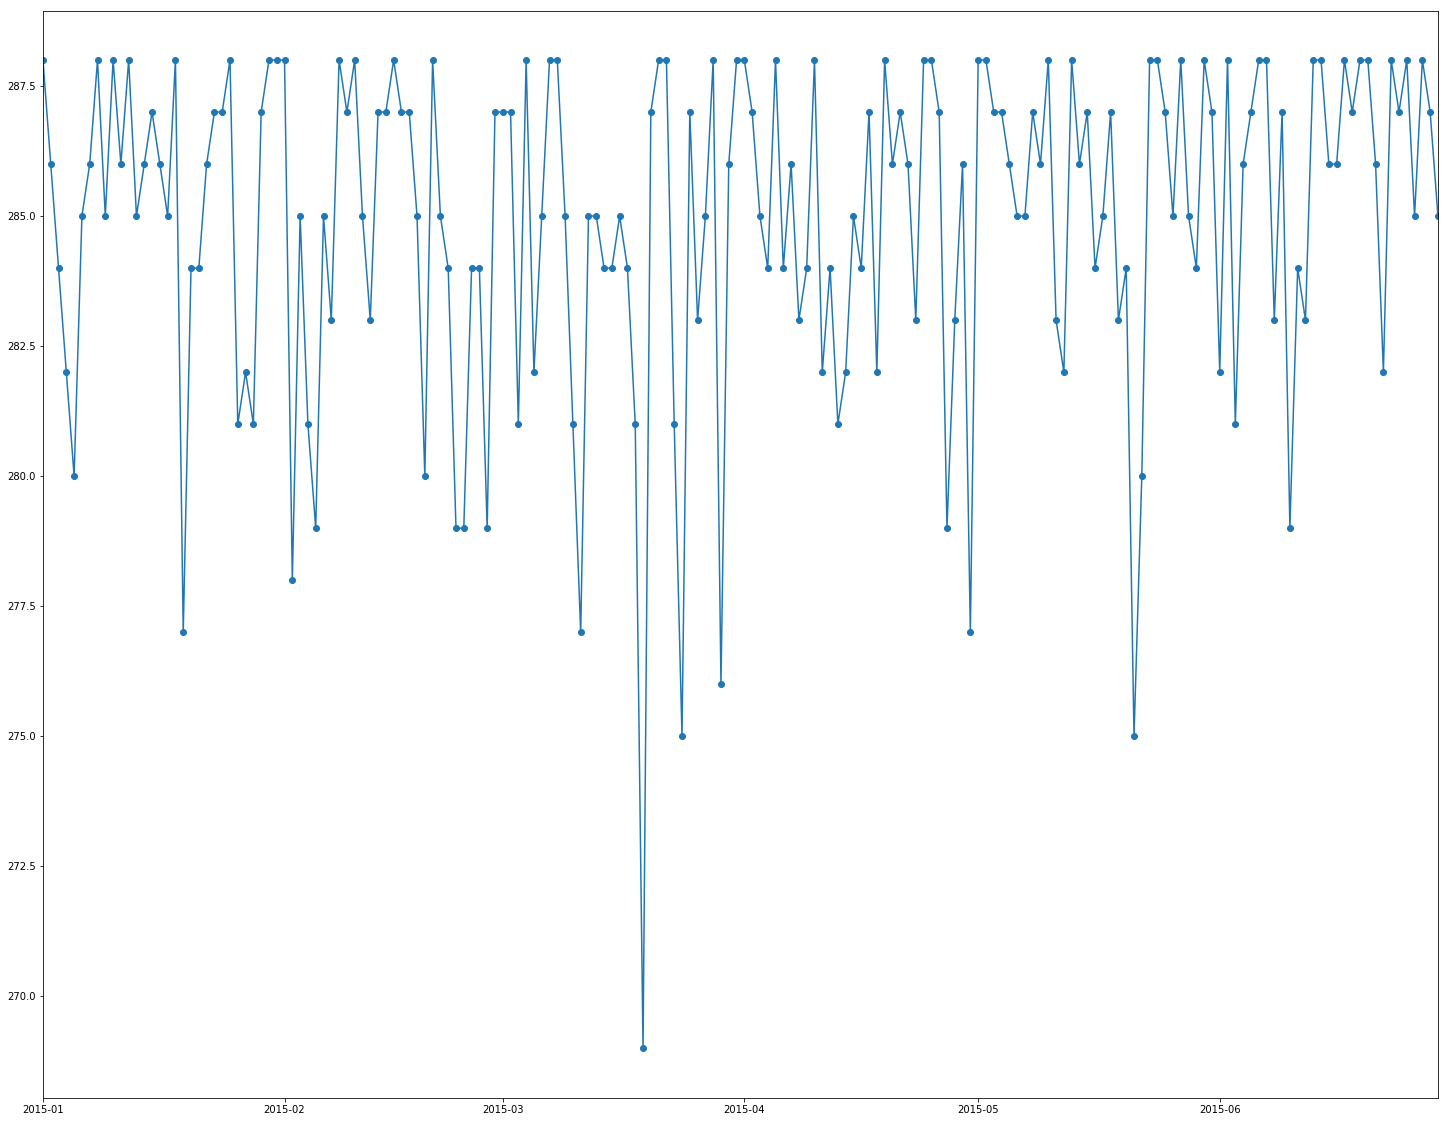

In [73]:
df_since_2015.start_interval_s.dt.date.value_counts().plot(marker='o', figsize=(25, 20))
# df_since_2015.start_interval_s
# df[df.start_interval_s >= '2015-01-01'].start_interval_s.dt.date.value_counts()
# df.start_interval_s[df.start_interval_s. >= '2015-01-01'].dt.date
# df.loc['2015-01-01':].groupby()
# df.speed_mean.plot()

AttributeError: Unknown property figsize

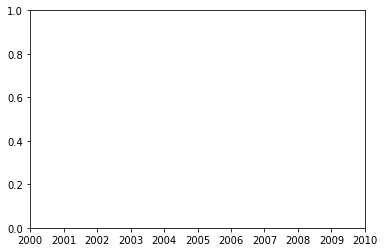

In [119]:
ser = df_since_2015\
    .set_index('start_interval_s')\
    .speed_mean
# [df_since_2015.start_interval_s <= '2015-01-03']
plt.scatter(ser.index, ser, figsize=(25, 20))
#     .plot(x=lambda ser: ser.index, y=lambda ser: ser.values(), kind='scatter', figsize=(25, 20))